In [2]:
# 크림 제품페이지에서 거래 데이터 크롤링 코드
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import random
import pandas as pd
# Selenium 옵션값 설정
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--window-size=1920,1080')
options.add_argument('user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=options)
#############################################################
# 로그인
driver.get('https://kream.co.kr/login')
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID,'wrap')))
driver.find_element(By.CSS_SELECTOR,'input[type="email"]').send_keys(input('아이디 입력 : '))
driver.find_element(By.CSS_SELECTOR,'input[type="password"]').send_keys(input('비밀번호 입력 : '))
driver.find_element(By.CLASS_NAME,'login-btn-box').click()
#############################################################
# 제품 페이지 접속
pid = input('product ID : ')
size = input('size : ')
driver.get(f'https://kream.co.kr/products/{pid}/?size={size}')
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID,'wrap')))
print(driver.title)
# 체결 내역 더보기 버튼 클릭
driver.find_element(By.XPATH,'//*[@id="panel1"]/a').click()
WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME, 'price_body')))
#############################################################
# 거래 데이터가 있는 클래스 찾기
price_body = driver.find_element(By.CLASS_NAME,'price_body')
# 페이지 무한스크롤
loaded = 50 # 한번 스크롤에 불러오는 데이터 개수
for i in range(driver.execute_script('return arguments[0].scrollHeight', price_body), int(int(input('로딩할 거래 데이터 수 입력 : ')) / loaded)*1650, 1650):
    # 첫번째만 1658px 스크롤, 나머지는 1650px 스크롤
    if driver.execute_script('return arguments[0].scrollHeight', price_body) == 1658:
        driver.execute_script('arguments[0].scrollTop = arguments[1]', price_body, 1658)
    else:
        driver.execute_script('arguments[0].scrollTop = arguments[1]', price_body, i)
    # 스크롤 후 2~3초 대기
    time.sleep(random.uniform(2,3))
    try:
        WebDriverWait(driver, 60).until(EC.presence_of_element_located((By.XPATH, f'//div[@class="body_list"][{loaded}]')))
        loaded += 50
        print(f'{loaded}개 데이터 호출 완료')
    except:
        print('데이터 추가 로딩 실패. 스크롤 반복문 종료')
        break
#############################################################
# 스크롤 후 viewport에 보여지는 데이터를 salesList에 추가
body_list = price_body.find_elements(By.CLASS_NAME,'body_list')
salesList = []
count = 0
for sales in body_list:
    date_sold = sales.find_element(By.XPATH,'./div[3]/span').text
    size_sold = sales.find_element(By.XPATH,'./div[1]/span').text
    price_sold = sales.find_element(By.XPATH,'./div[2]/span').text
    try:
        sales.find_element(By.XPATH,'./div[3]/div/i/span').text
        express = True
    except:
        express = False
    
    salesList.append({
        '거래일': date_sold,
        '옵션': size_sold,
        '거래가': price_sold,
        '빠른배송': express
    })
    count += 1
    print(f'리스트에 {count}개 데이터 추가 완료')
#############################################################
# 최종 데이터 출력
print(f"총 {len(salesList)}개의 거래 데이터가 수집되었습니다.")
tables = pd.DataFrame(salesList)

KeyboardInterrupt: Interrupted by user

## 빠른배송과 일반배송의 거래가 차이의 평균

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rc('font', family='Arial')

In [5]:
df = pd.read_csv('[28029-270] 나이키 덩크 로우 레트로 블랙 _ Nike _ KREAM.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21000 non-null  int64 
 1   거래일         21000 non-null  object
 2   옵션          21000 non-null  int64 
 3   거래가         21000 non-null  object
 4   빠른배송        21000 non-null  bool  
dtypes: bool(1), int64(2), object(2)
memory usage: 676.9+ KB


In [7]:

df.head()

,Unnamed: 0,거래일,옵션,거래가,빠른배송
0,0,24/09/28,270,"97,000원",True
1,1,24/09/27,270,"92,000원",False
2,2,24/09/27,270,"97,000원",True
3,3,24/09/27,270,"96,000원",True
4,4,24/09/27,270,"96,000원",True


In [8]:
df['거래일'] = pd.to_datetime(df['거래일'], format='%y/%m/%d')

In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  21000 non-null  int64         
 1   거래일         21000 non-null  datetime64[ns]
 2   옵션          21000 non-null  int64         
 3   거래가         21000 non-null  object        
 4   빠른배송        21000 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(1)
memory usage: 676.9+ KB


In [10]:
df.head()

,Unnamed: 0,거래일,옵션,거래가,빠른배송
0,0,2024-09-28,270,"97,000원",True
1,1,2024-09-27,270,"92,000원",False
2,2,2024-09-27,270,"97,000원",True
3,3,2024-09-27,270,"96,000원",True
4,4,2024-09-27,270,"96,000원",True


In [11]:

df['거래가'] = df['거래가'].str.replace('원','').str.replace(',','').astype(int)

In [12]:
df.head()

,Unnamed: 0,거래일,옵션,거래가,빠른배송
0,0,2024-09-28,270,97000,True
1,1,2024-09-27,270,92000,False
2,2,2024-09-27,270,97000,True
3,3,2024-09-27,270,96000,True
4,4,2024-09-27,270,96000,True


C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


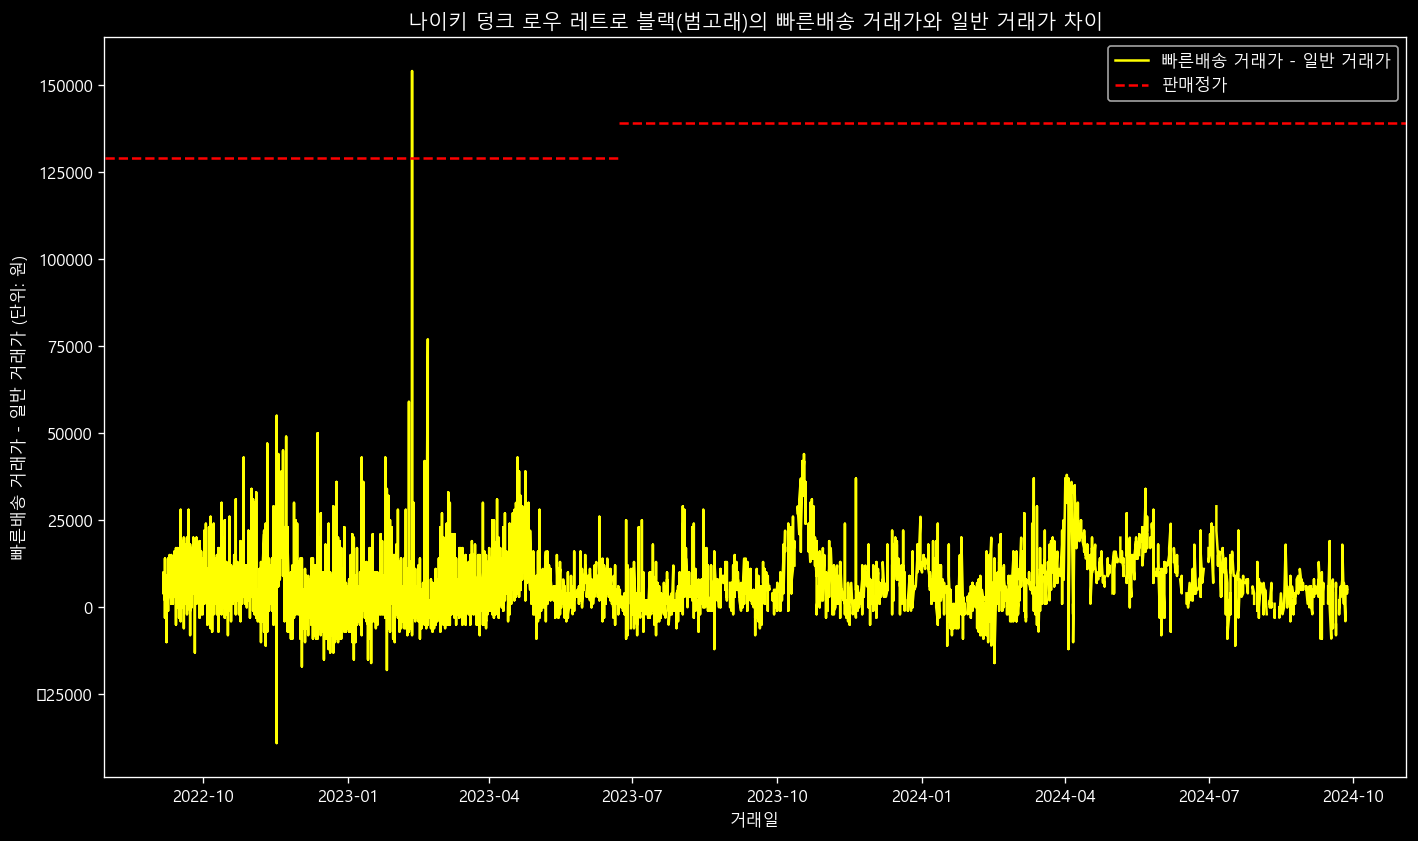

In [31]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 'Nanum Gothic'을 설치한 경우 해당 폰트로 설정 가능

# 나머지 그래프 코드
plt.style.use('dark_background')
plt.figure(figsize=(14,8), dpi=120)

# 빠른배송이 True인 거래가에서 False인 거래가를 뺀 차이 계산
df_diff = df[df['빠른배송'] == True].set_index('거래일')['거래가'] - df[df['빠른배송'] == False].set_index('거래일')['거래가']

# 그래프 그리기
plt.plot(df_diff.index, df_diff.values, color='yellow', label='빠른배송 거래가 - 일반 거래가')

plt.axhline(y=119000, color='red', linestyle='--', xmin=0, xmax=(pd.to_datetime('2022-01-01') - df['거래일'].min()).days / (df['거래일'].max() - df['거래일'].min()).days)
plt.axhline(y=129000, color='red', linestyle='--', xmin=(pd.to_datetime('2022-01-01') - df['거래일'].min()).days / (df['거래일'].max() - df['거래일'].min()).days, xmax=(pd.to_datetime('2023-07-01') - df['거래일'].min()).days / (df['거래일'].max() - df['거래일'].min()).days)
plt.axhline(y=139000, color='red', linestyle='--', xmin=(pd.to_datetime('2023-07-01') - df['거래일'].min()).days / (df['거래일'].max() - df['거래일'].min()).days, label='판매정가')

plt.xlabel('거래일')
plt.ylabel('빠른배송 거래가 - 일반 거래가 (단위: 원)')
plt.title('나이키 덩크 로우 레트로 블랙(범고래)의 빠른배송 거래가와 일반 거래가 차이')
plt.legend()

plt.show()

In [32]:
import pandas as pd

# 빠른배송이 True인 거래가에서 False인 거래가를 뺀 차이 계산
df_diff = df[df['빠른배송'] == True].set_index('거래일')['거래가'] - df[df['빠른배송'] == False].set_index('거래일')['거래가']

# 가장 큰 값 제외
df_diff_without_max = df_diff[df_diff != df_diff.max()]

# 차이값들의 평균 계산
mean_diff = df_diff_without_max.mean()

# 결과 출력
print("빠른배송 거래가 - 일반 거래가 차이 (가장 큰 값 제외)")
print(df_diff_without_max)
print(f"\n가장 큰 값을 제외한 차이값의 평균: {mean_diff}")

빠른배송 거래가 - 일반 거래가 차이 (가장 큰 값 제외)
거래일
2022-09-06    9000.0
2022-09-06    9000.0
2022-09-06    6000.0
2022-09-06    8000.0
2022-09-06    7000.0
               ...  
2024-09-27    4000.0
2024-09-27    5000.0
2024-09-27    4000.0
2024-09-27    5000.0
2024-09-28       NaN
Name: 거래가, Length: 285810, dtype: float64

가장 큰 값을 제외한 차이값의 평균: 4313.417733928059
